<a href="https://colab.research.google.com/github/juneilsam/TensorFlowDeveloper/blob/main/Exercises/Exercise_8_Multiclass_with_Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[원작자 깃헙](https://github.com/lmoroney/dlaicourse)

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [2]:
uploaded=files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv
Saving sign_mnist_test.csv to sign_mnist_test.csv


In [6]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels

In [7]:
training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

In [8]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [9]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:
validation_datagen = ImageDataGenerator(
    rescale=1. /255)

In [14]:
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [15]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

In [17]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                    steps_per_epoch=len(training_images) / 32,
                    epochs=15,
                    validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                    validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

Epoch 1/15
857/857 [==============================] - 50s 58ms/step - loss: 2.8200 - accuracy: 0.1469 - val_loss: 1.9799 - val_accuracy: 0.3476
Epoch 2/15
857/857 [==============================] - 49s 57ms/step - loss: 2.1334 - accuracy: 0.3299 - val_loss: 1.6328 - val_accuracy: 0.4293
Epoch 3/15
857/857 [==============================] - 49s 57ms/step - loss: 1.7643 - accuracy: 0.4360 - val_loss: 1.1708 - val_accuracy: 0.6015
Epoch 4/15
857/857 [==============================] - 49s 58ms/step - loss: 1.5232 - accuracy: 0.5077 - val_loss: 1.2746 - val_accuracy: 0.5385
Epoch 5/15
857/857 [==============================] - 49s 57ms/step - loss: 1.3588 - accuracy: 0.5582 - val_loss: 0.8198 - val_accuracy: 0.7248
Epoch 6/15
857/857 [==============================] - 49s 57ms/step - loss: 1.2452 - accuracy: 0.5957 - val_loss: 0.8216 - val_accuracy: 0.7242
Epoch 7/15
857/857 [==============================] - 48s 56ms/step - loss: 1.1427 - accuracy: 0.6251 - val_loss: 0.7768 - val_accuracy:

[355.1888732910156, 0.5343000292778015]

In [19]:
import matplotlib.pyplot as plt

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
epochs = range(len(acc))

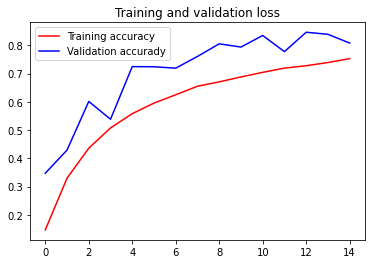

In [22]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accurady')
plt.title('Training and validation loss')
plt.legend()
plt.show()